<a href="https://colab.research.google.com/github/uskhbs/Machine_learning/blob/main/3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

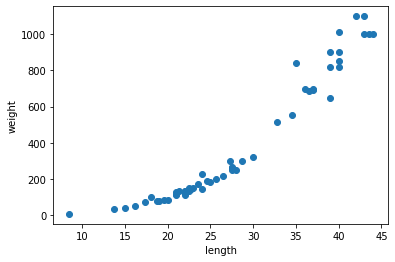

(42, 1) (14, 1)
0.9746459963987609
0.9804899950518966


In [8]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

#1차원 배열에서 2차원 배열로 변경
train_input = train_input.reshape(-1,1) #-1 로 크기를 지정하면 나머지 원소 개수로 모두 채우라는 의미
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

#결정계수(R^2)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

#이웃의 개수를 3으로 설정 -> 모델을 조금더 복잡하게 만든다 (기본 5)
knr.n_neighbors = 3

#K-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input,test_target))
print(knr.score(train_input, train_target))

In [11]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오파를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

22.685714285714287


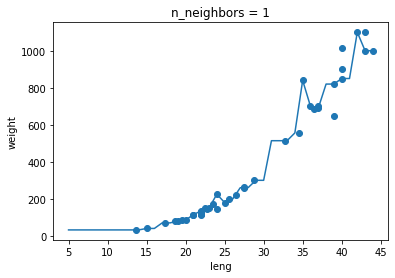

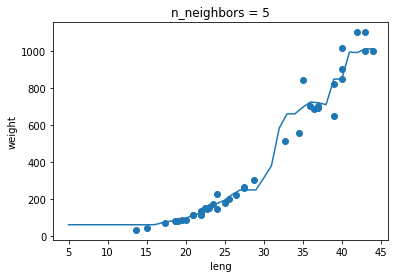

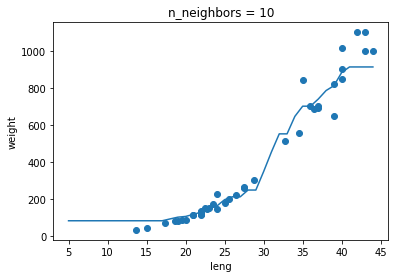

In [15]:
# 과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델 테스트 
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for n in [1,5,10] :
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction) #-> x축 값과 y축 값을 받아 선 그래프를 그린다
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('leng')
  plt.ylabel('weight')
  plt.show()